# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import RepeatedKFold for cross-validation
from sklearn.model_selection import RepeatedKFold

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Pickle the best models for each dataset
import pickle

from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression

from pprint import pprint

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Imports for forward and backward selection
from sklearn.feature_selection import SequentialFeatureSelector

# Imports for PCA and PLS regression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the datasets
online_abusive_attacks = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_final.csv')

In [3]:
online_abusive_attacks.head()

,followers_count,friends_count,verified,statuses_count,women,love,news,account,feminist,official,follow,products,tweets,womens,Toxicity
0,39632.0,15271.0,0,71848.0,0,0,0,0,0,0,0,0,0,0,0.0
1,20606.0,9472.0,0,167382.0,0,0,0,0,0,0,0,0,0,0,13.0
2,20445.0,9396.0,0,165314.0,0,0,0,0,0,0,0,0,0,0,45.0
3,20506.0,9430.0,0,166164.0,0,0,0,0,0,0,0,0,0,0,49.0
4,20583.0,9469.0,0,167488.0,0,0,0,0,0,0,0,0,0,0,7.0


In [4]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

# Linear Modeling

In [5]:
# Get only the numeric features for each dataset
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)

In [6]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [7]:
for columns in [online_abusive_attacks_X_numeric.columns]:
  print(columns)

Index(['followers_count', 'friends_count', 'verified', 'statuses_count',
       'women', 'love', 'news', 'account', 'feminist', 'official', 'follow',
       'products', 'tweets', 'womens'],
      dtype='object')


In [8]:
# Train test split for each dataset
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)

In [9]:
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=True)


In [10]:
online_abusive_attacks_lasso_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_ridge_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_elasticnet_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

## Online Abusive Attacks Stepwise Regression

In [11]:
online_abusive_attacks_model = LinearRegression()

online_abusive_attacks_forward = SequentialFeatureSelector(online_abusive_attacks_model, n_features_to_select=3, direction="forward")
online_abusive_attacks_backward = SequentialFeatureSelector(online_abusive_attacks_model, n_features_to_select=3, direction="backward")

In [12]:
online_abusive_attacks_forward.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3)

In [13]:
online_abusive_attacks_backward.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=3)

In [14]:
online_abusive_attacks_forward_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_forward.get_support()]
online_abusive_attacks_backward_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_backward.get_support()]

print("Forward Selection Features:", online_abusive_attacks_forward_features)
print("Backward Selection Features:", online_abusive_attacks_backward_features)

Forward Selection Features: Index(['women', 'news', 'products'], dtype='object')
Backward Selection Features: Index(['women', 'news', 'products'], dtype='object')


In [15]:
online_abusive_attacks_forward_linear_model = LinearRegression()
online_abusive_attacks_forward_linear_model.fit(online_abusive_attacks_X_train[online_abusive_attacks_forward_features], online_abusive_attacks_y_train)
online_abusive_attacks_forward_predictions = online_abusive_attacks_forward_linear_model.predict(online_abusive_attacks_X_test[online_abusive_attacks_forward_features])
online_abusive_attacks_forward_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_forward_predictions)
online_abusive_attacks_forward_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_forward_predictions)

print(f"Forward Selection RMSE (Online Abusive Attacks): {online_abusive_attacks_forward_rmse:.2f}")
print(f"Forward Selection R2 Score (Online Abusive Attacks): {online_abusive_attacks_forward_r2:.2f}")

Forward Selection RMSE (Online Abusive Attacks): 29.13
Forward Selection R2 Score (Online Abusive Attacks): -0.01


In [16]:
online_abusive_attacks_backward_linear_model = LinearRegression()
online_abusive_attacks_backward_linear_model.fit(online_abusive_attacks_X_train[online_abusive_attacks_backward_features], online_abusive_attacks_y_train)
online_abusive_attacks_backward_predictions = online_abusive_attacks_backward_linear_model.predict(online_abusive_attacks_X_test[online_abusive_attacks_backward_features])
online_abusive_attacks_backward_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_backward_predictions)
online_abusive_attacks_backward_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_backward_predictions)

print(f"Backward Selection RMSE (Online Abusive Attacks): {online_abusive_attacks_backward_rmse:.2f}")
print(f"Backward Selection R2 Score (Online Abusive Attacks): {online_abusive_attacks_backward_r2:.2f}")

Backward Selection RMSE (Online Abusive Attacks): 29.13
Backward Selection R2 Score (Online Abusive Attacks): -0.01


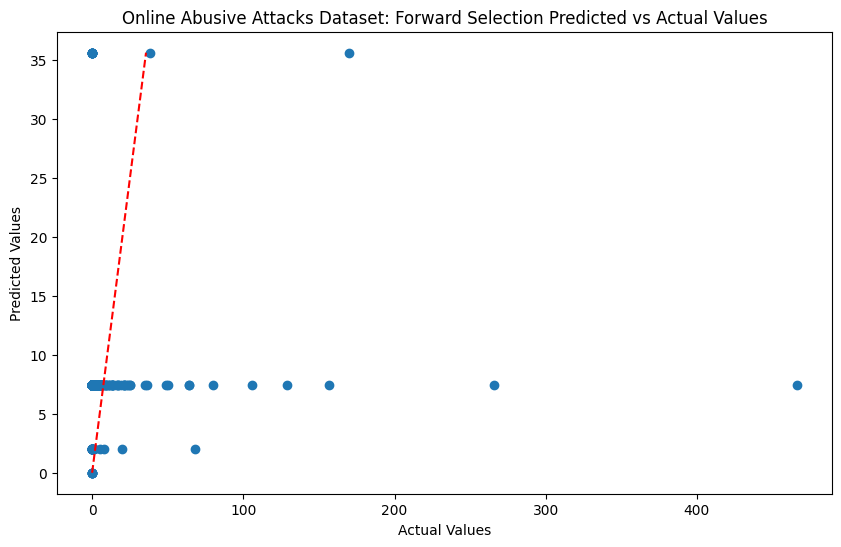

In [17]:
# Plot the predicted vs actual values for forward selection on the Online Abusive Attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_forward_predictions)
# Plot the linear regression line
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_forward_predictions)], [min(online_abusive_attacks_y_test), max(online_abusive_attacks_forward_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Online Abusive Attacks Dataset: Forward Selection Predicted vs Actual Values")
plt.show()

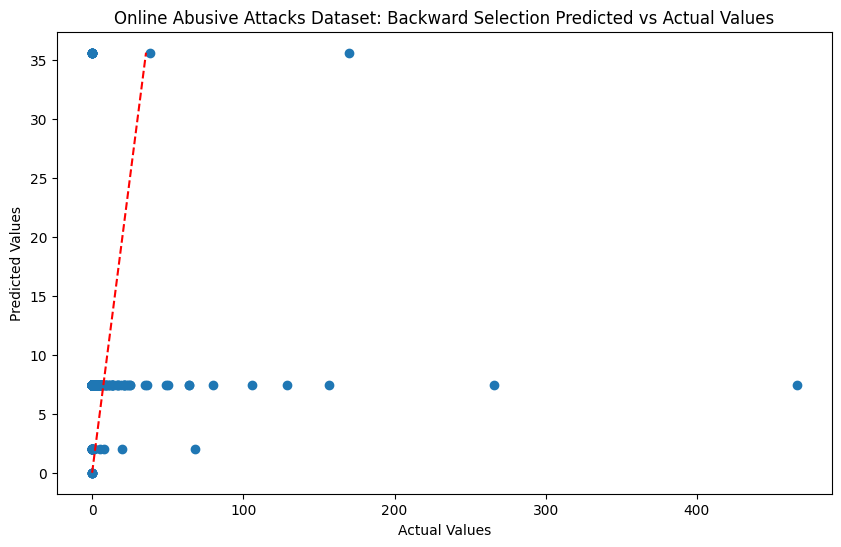

In [18]:
# Plot the predicted vs actual values for backward selection on the Online Abusive Attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_backward_predictions)
# Plot the linear regression line
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_backward_predictions)], [min(online_abusive_attacks_y_test), max(online_abusive_attacks_backward_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Online Abusive Attacks Dataset: Backward Selection Predicted vs Actual Values")
plt.show()

In [19]:
# Compare the RMSE values for forward and backward selection on the Online Abusive Attacks dataset
print(f"Forward Selection RMSE: {online_abusive_attacks_forward_rmse:.2f}")
print(f"Backward Selection RMSE: {online_abusive_attacks_backward_rmse:.2f}")

# Determine which model performed better (RMSE value)
if online_abusive_attacks_forward_rmse < online_abusive_attacks_backward_rmse:
    print(f"Forward Selection performed better on the Online Abusive Attacks dataset with an RMSE of {online_abusive_attacks_forward_rmse:.2f}.")
else:
    print(f"Backward Selection performed better on the Online Abusive Attacks dataset with an RMSE of {online_abusive_attacks_backward_rmse:.2f}.")
print()

# Compare the R2 values for forward and backward selection on the Online Abusive Attacks dataset
print(f"Forward Selection R2 Score: {online_abusive_attacks_forward_r2:.2f}")
print(f"Backward Selection R2 Score: {online_abusive_attacks_backward_r2:.2f}")

# Determine which model performed better (R2 value)
if online_abusive_attacks_forward_r2 > online_abusive_attacks_backward_r2:
    print(f"Forward Selection performed better on the Online Abusive Attacks dataset with an R2 score of {online_abusive_attacks_forward_r2:.2f}.")
else:
    print(f"Backward Selection performed better on the Online Abusive Attacks dataset with an R2 score of {online_abusive_attacks_backward_r2:.2f}.")

Forward Selection RMSE: 29.13
Backward Selection RMSE: 29.13
Backward Selection performed better on the Online Abusive Attacks dataset with an RMSE of 29.13.

Forward Selection R2 Score: -0.01
Backward Selection R2 Score: -0.01
Backward Selection performed better on the Online Abusive Attacks dataset with an R2 score of -0.01.


## Online Abusive Attacks PCR

In [45]:
def pcr_tests(max_components_range):
  pcr_variance = []
  pcr_scores = []
  for i in max_components_range:
    pcr_model = make_pipeline(PCA(n_components=i), LinearRegression())
    pcr_model.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)
    pcr_model_pca = pcr_model.named_steps['pca']
    pcr_predictions = pcr_model.predict(online_abusive_attacks_X_test)
    pcr_explained_variance = pcr_model_pca.explained_variance_ratio_
    pcr_explained_variance_ratio = np.sum(pcr_explained_variance)

    # Calculate the RMSE
    pcr_rmse = root_mean_squared_error(online_abusive_attacks_y_test, pcr_predictions)
    # Calculate the R2
    pcr_r2 = r2_score(online_abusive_attacks_y_test, pcr_predictions)

    print(f"Number of Components: {i}")
    print(pcr_explained_variance_ratio)

    pcr_variance.append(pcr_explained_variance)
    pcr_scores.append(pcr_explained_variance_ratio)

    plt.figure(figsize=(10, 6))
    plt.scatter(online_abusive_attacks_y_test, pcr_predictions)
    plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_y_test)], [min(online_abusive_attacks_y_test), max(online_abusive_attacks_y_test)], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Online Abusive Attacks Dataset: PCR Predicted vs Actual Values")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pcr_model_pca.explained_variance_ratio_) + 1), pcr_model_pca.explained_variance_ratio_, marker='o')
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Online Abusive Attacks Dataset: Explained Variance Ratio")
    plt.show()

  return pcr_variance, pcr_scores, pcr_rmse, pcr_r2, pcr_predictions

Number of Components: 1
0.1533762431477112


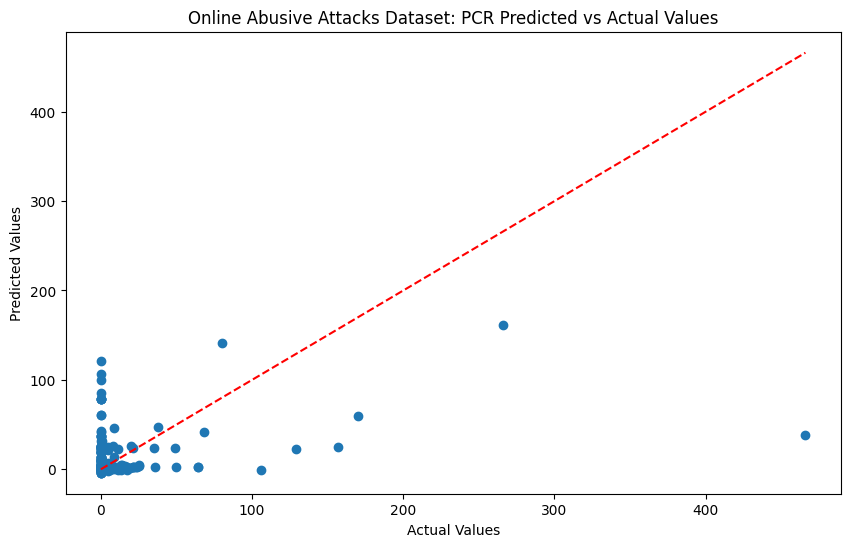

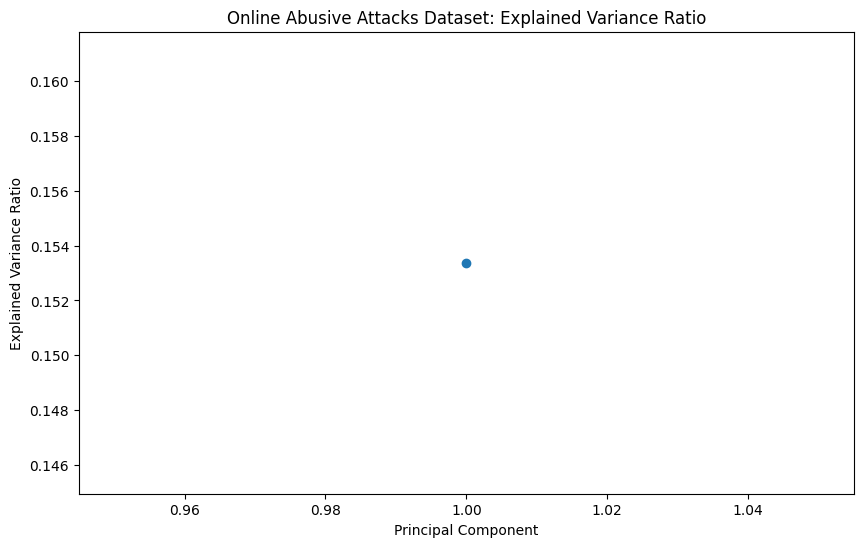

Number of Components: 2
0.24779807474961013


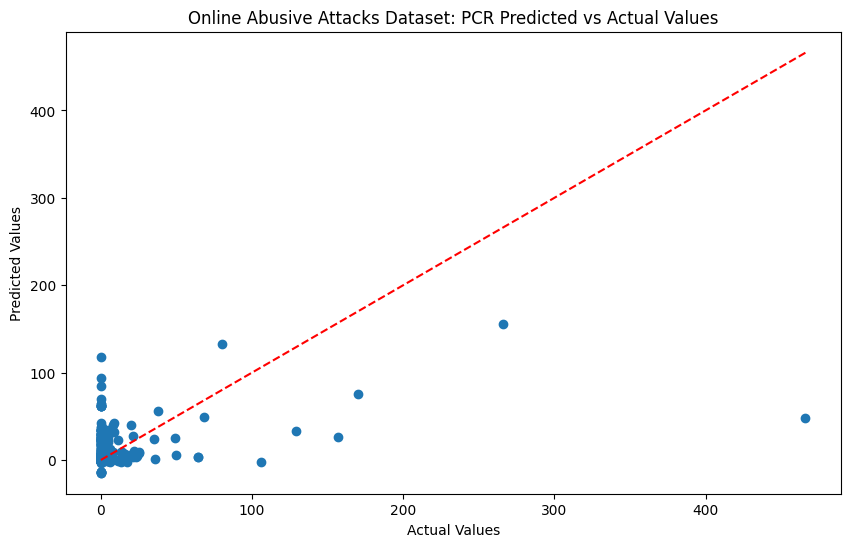

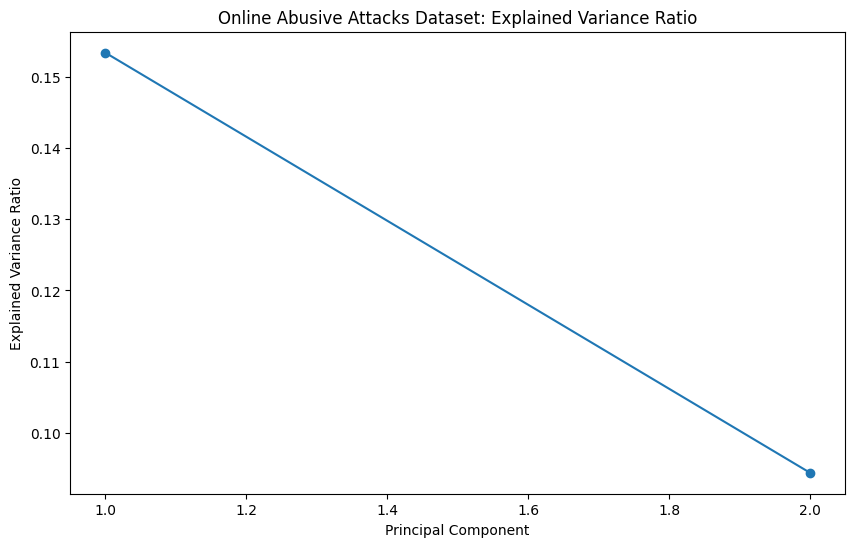

Number of Components: 3
0.3399723743937537


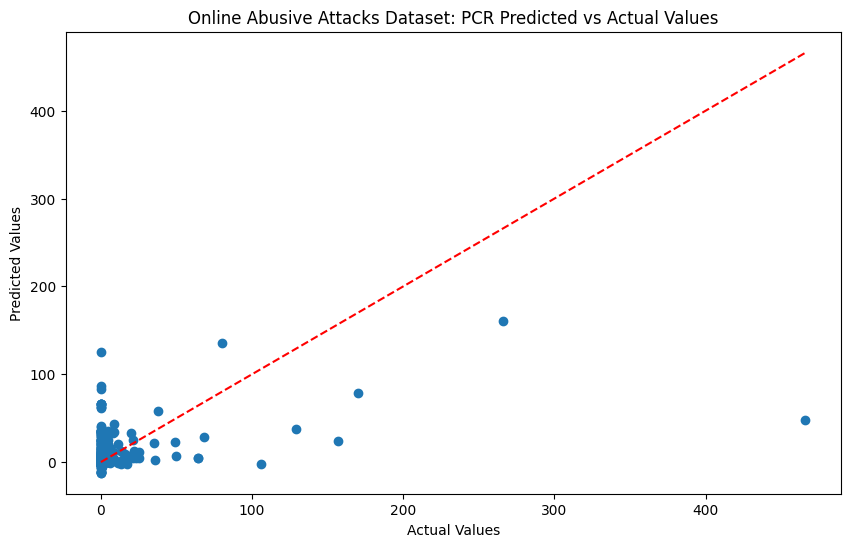

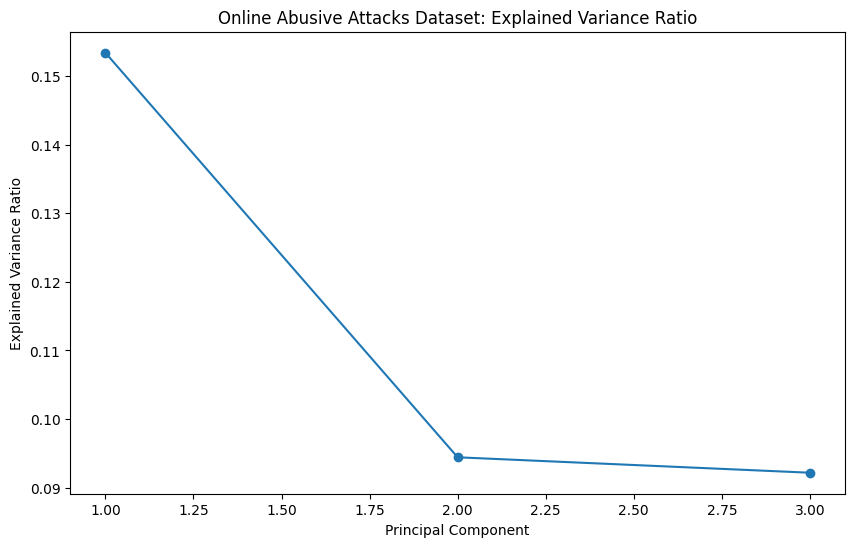

Number of Components: 4
0.420557311565669


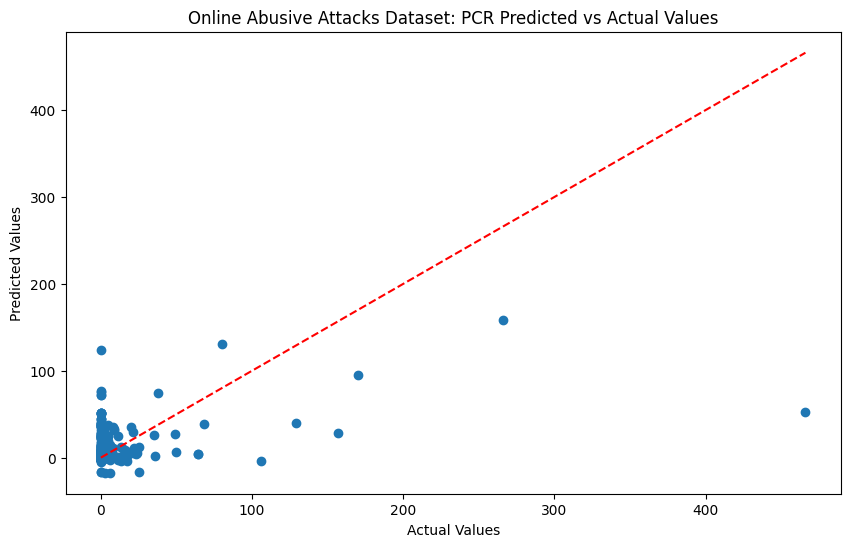

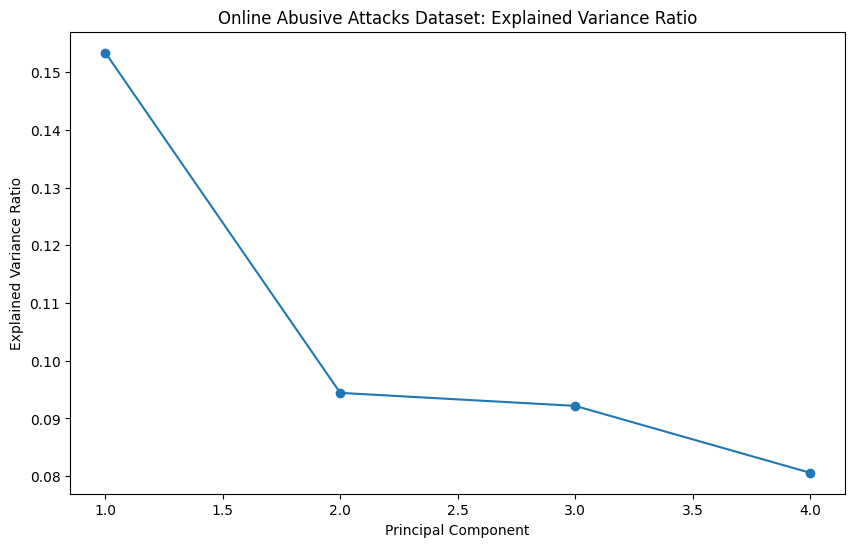

Number of Components: 5
0.499172760266702


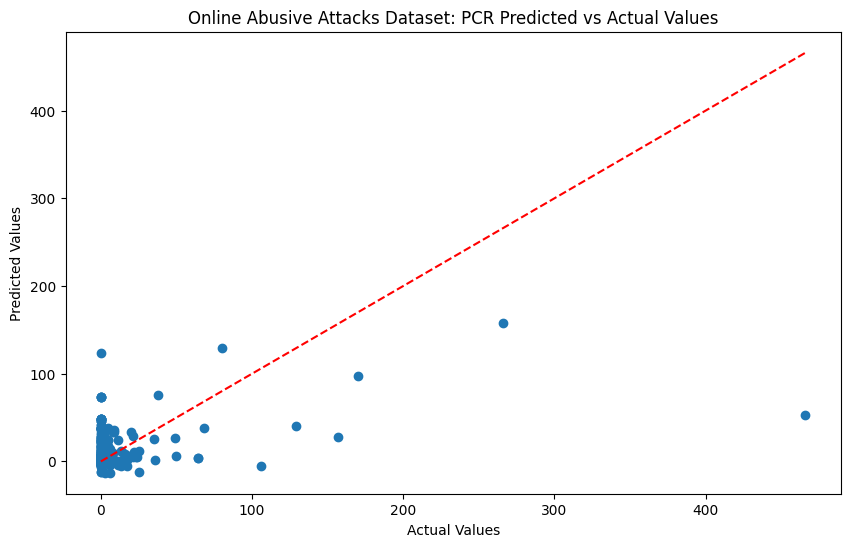

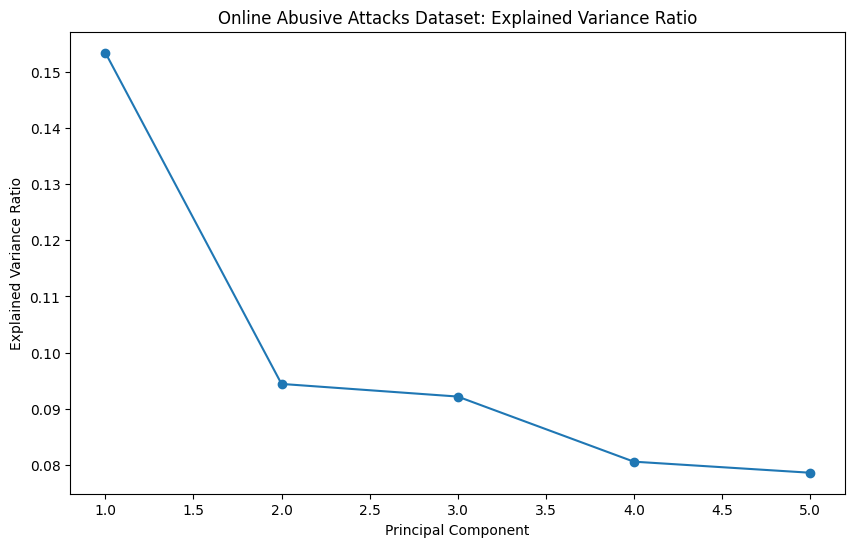

Number of Components: 6
0.5759985914772658


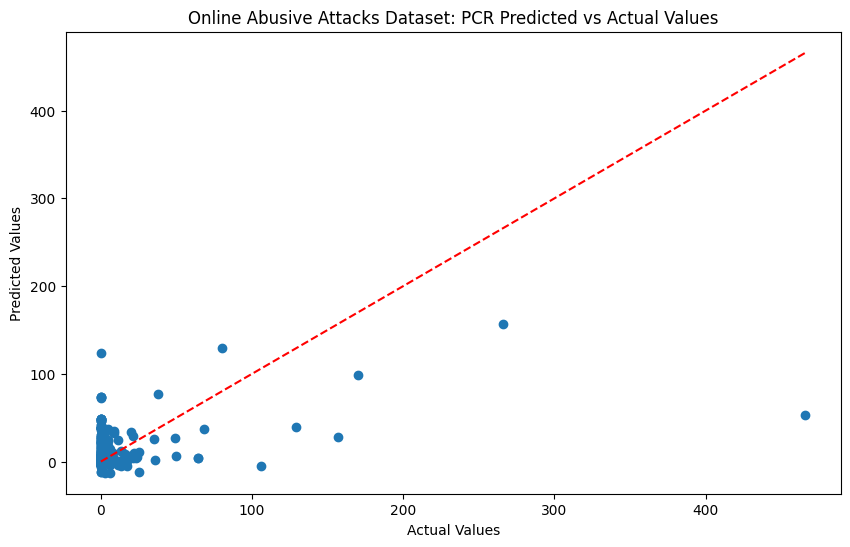

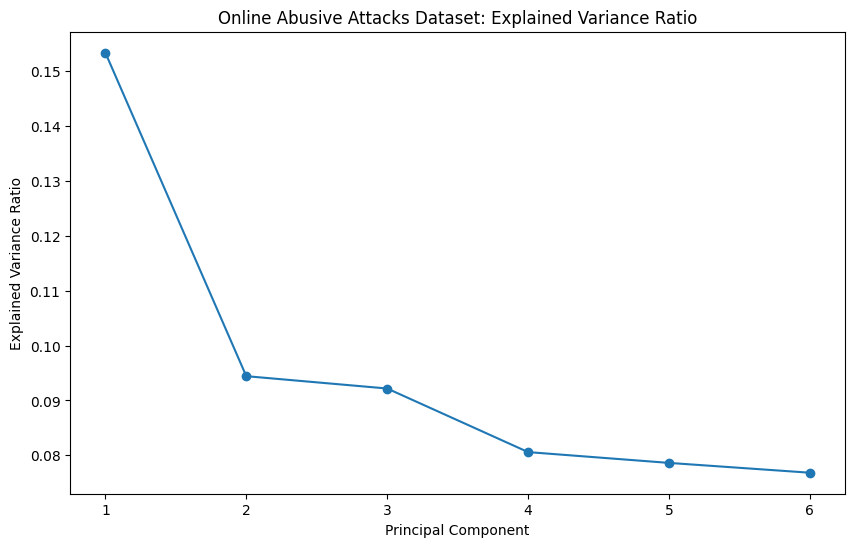

Number of Components: 7
0.64702246079998


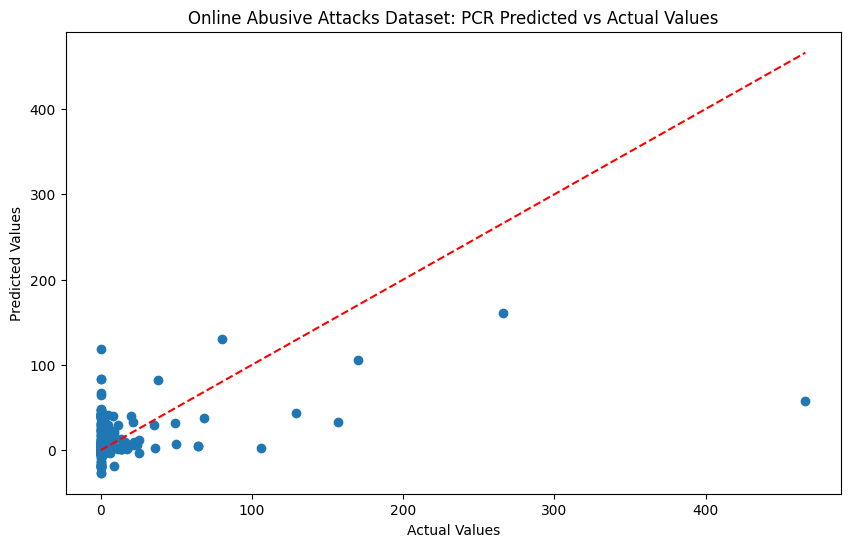

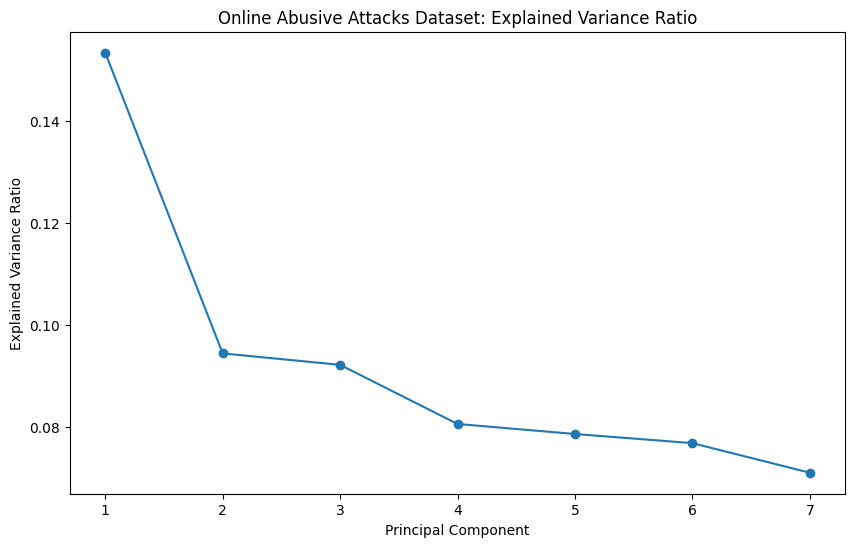

Number of Components: 8
0.7116759398176091


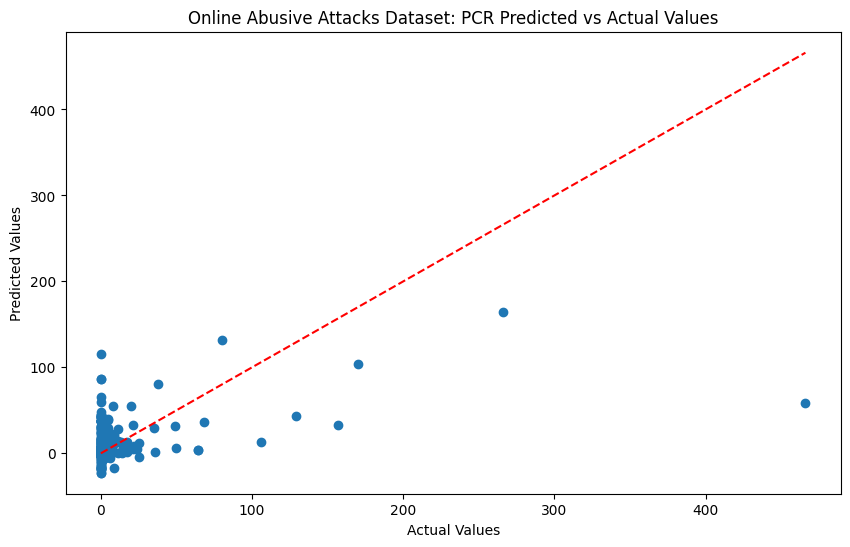

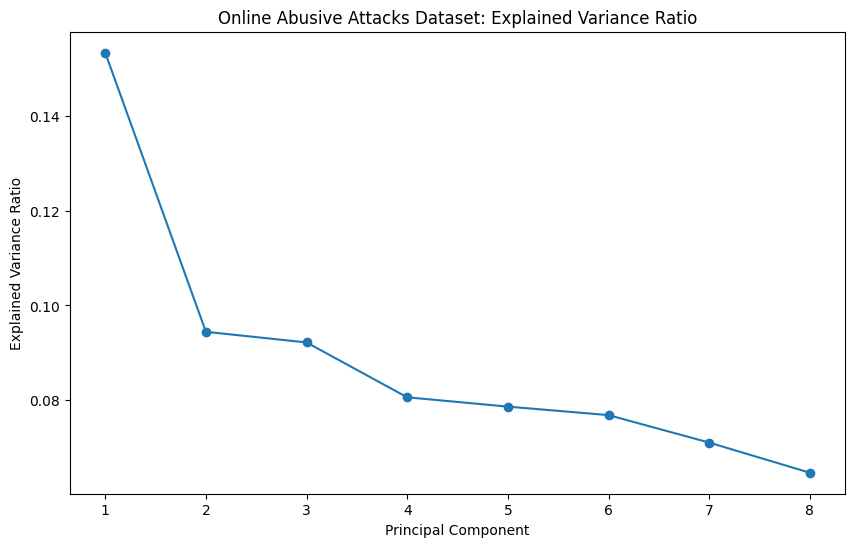

Number of Components: 9
0.7732385731232565


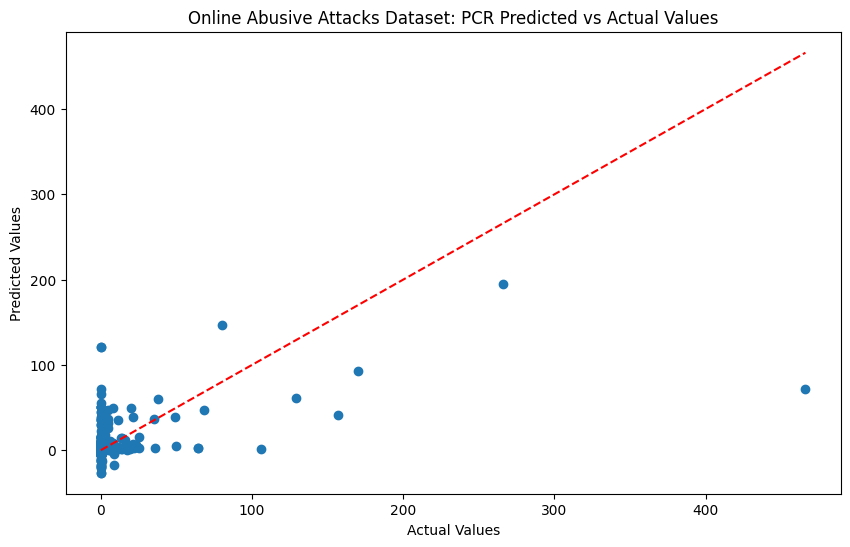

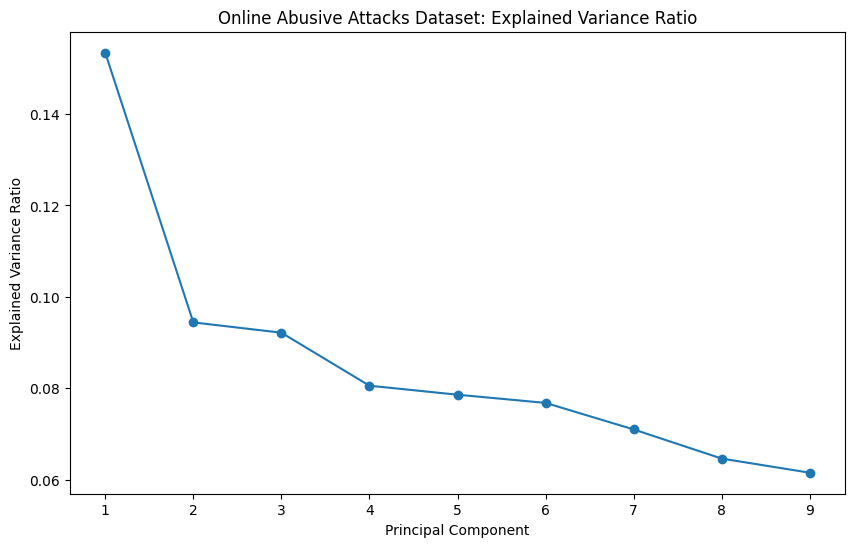

Number of Components: 10
0.8318189895800258


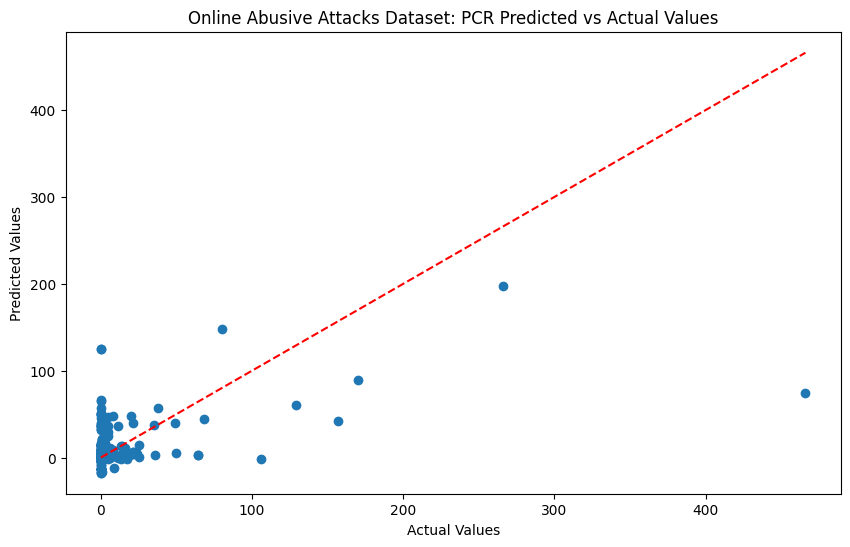

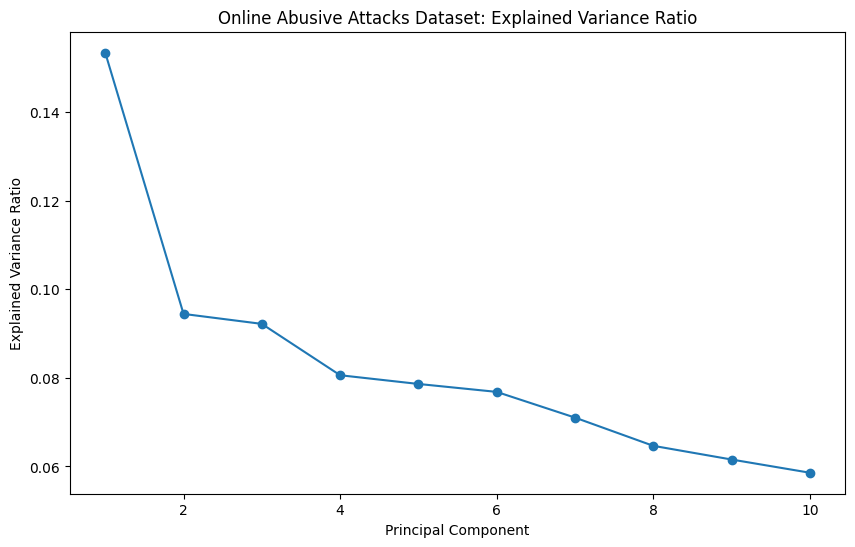

Number of Components: 11
0.8883251425448043


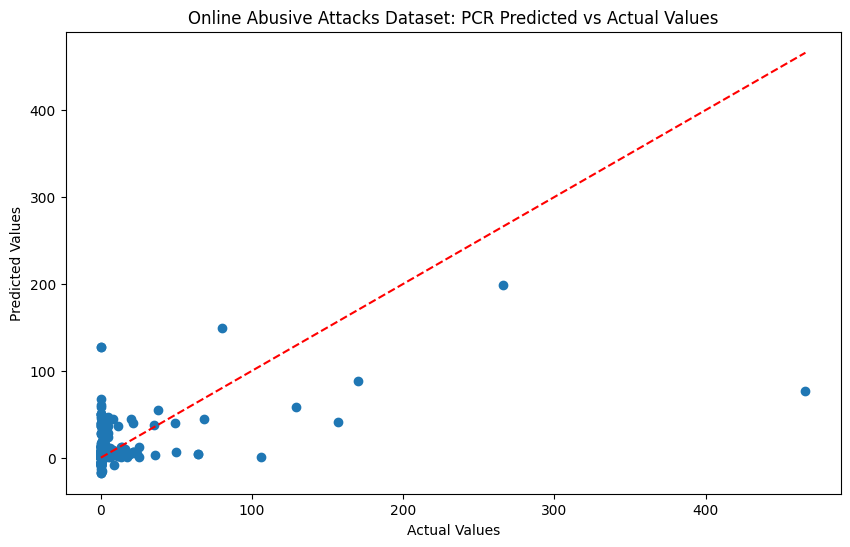

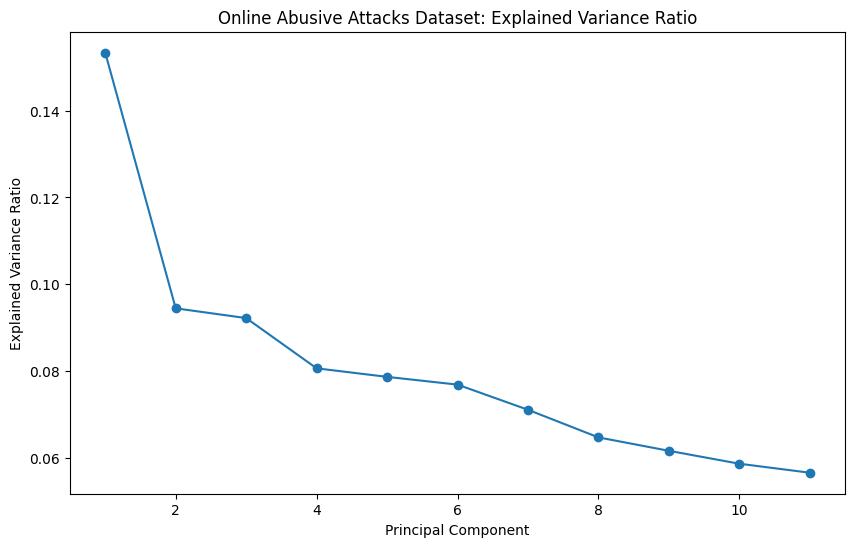

Number of Components: 12
0.9418911021058956


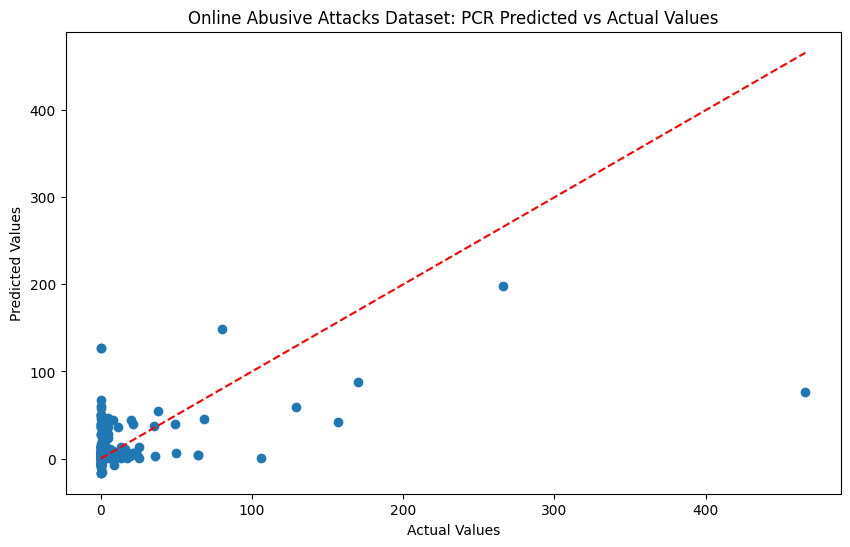

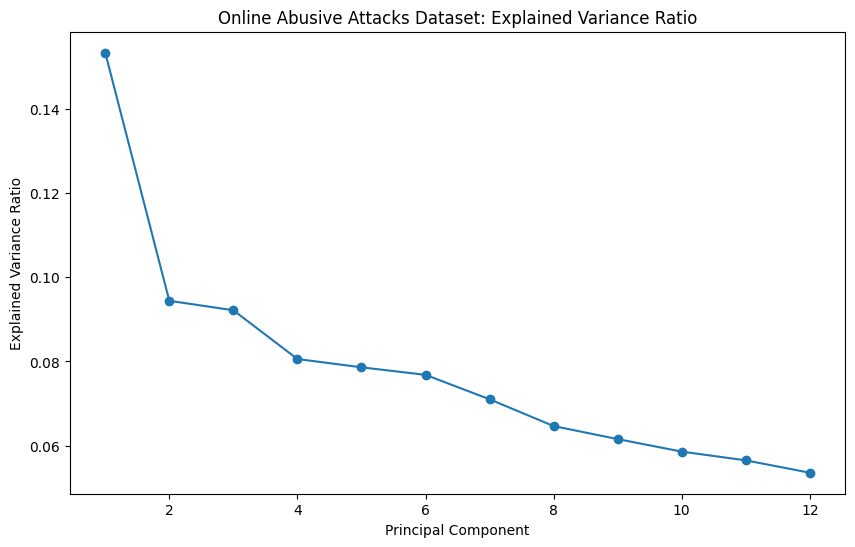

Number of Components: 13
0.9783437041625043


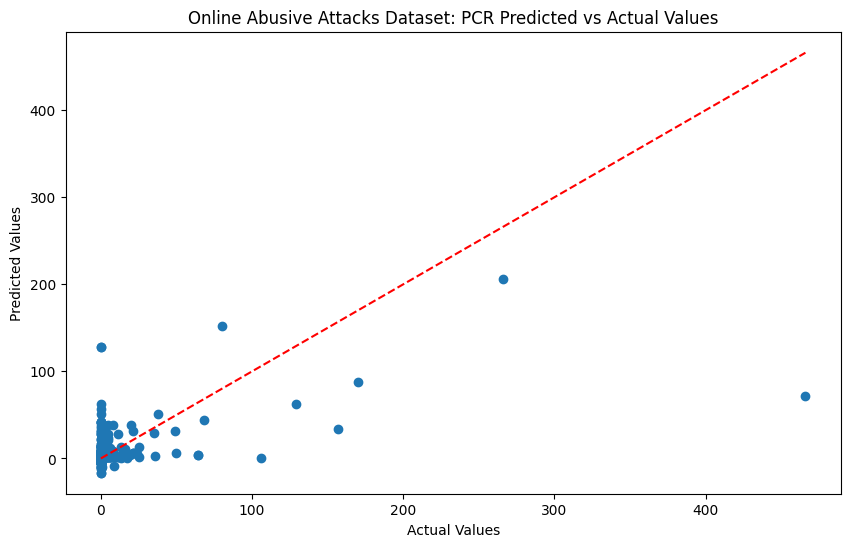

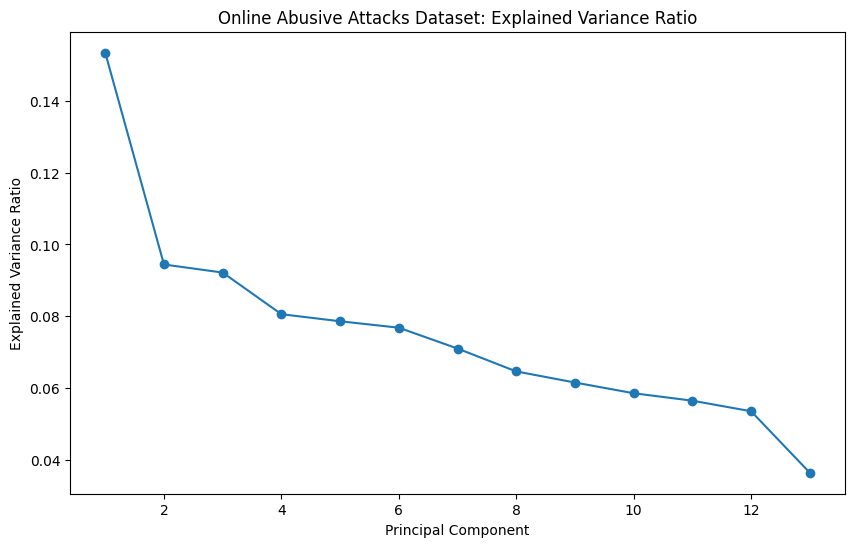

Number of Components: 14
1.0


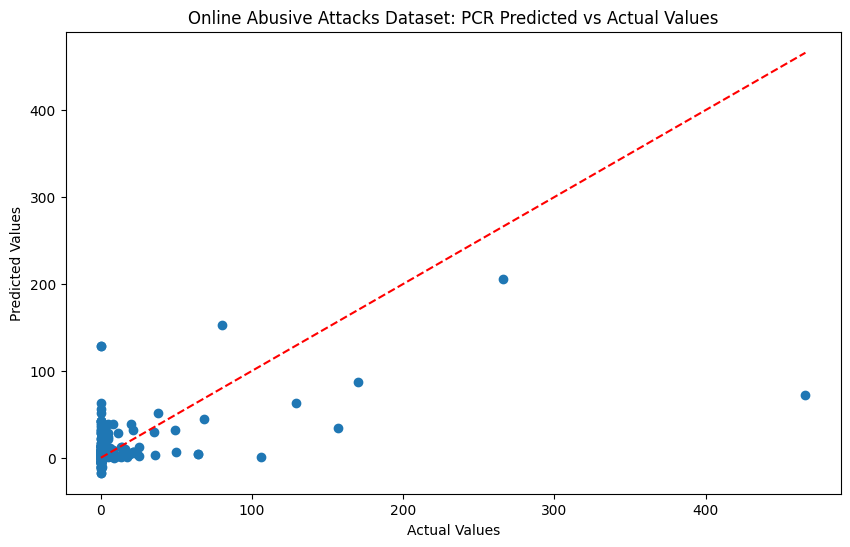

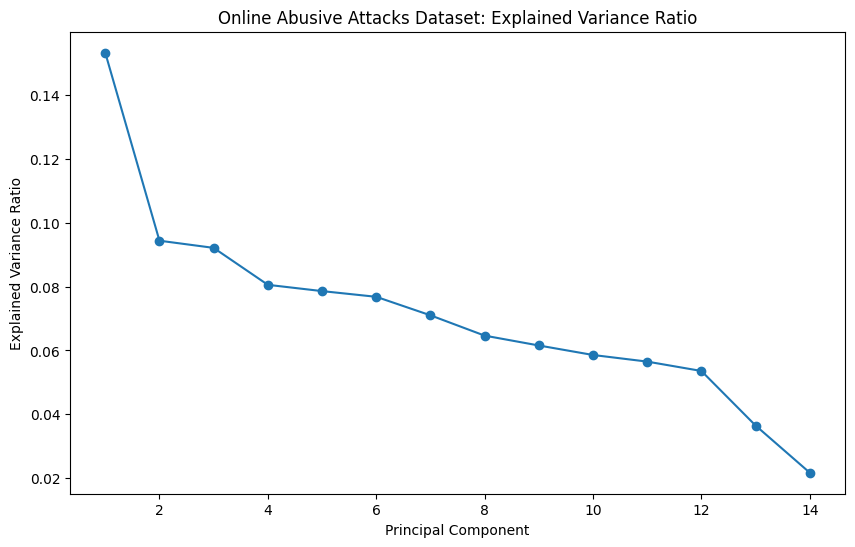

In [54]:
max_components_range = range(1, len(online_abusive_attacks_X_train.columns) + 1)
pcr_variance, pcr_scores, pcr_rmse, pcr_r2, pcr_predictions = pcr_tests(max_components_range)

In [55]:
pcr_variance

[array([0.15337624]),
 array([0.15337624, 0.09442183]),
 array([0.15337624, 0.09442183, 0.0921743 ]),
 array([0.15337624, 0.09442183, 0.0921743 , 0.08058494]),
 array([0.15337624, 0.09442183, 0.0921743 , 0.08058494, 0.07861545]),
 array([0.15337624, 0.09442183, 0.0921743 , 0.08058494, 0.07861545,
        0.07682583]),
 array([0.15337624, 0.09442183, 0.0921743 , 0.08058494, 0.07861545,
        0.07682583, 0.07102387]),
 array([0.15337624, 0.09442183, 0.0921743 , 0.08058494, 0.07861545,
        0.07682583, 0.07102387, 0.06465348]),
 array([0.15337624, 0.09442183, 0.0921743 , 0.08058494, 0.07861545,
        0.07682583, 0.07102387, 0.06465348, 0.06156263]),
 array([0.15337624, 0.09442183, 0.0921743 , 0.08058494, 0.07861545,
        0.07682583, 0.07102387, 0.06465348, 0.06156263, 0.05858042]),
 array([0.15337624, 0.09442183, 0.0921743 , 0.08058494, 0.07861545,
        0.07682583, 0.07102387, 0.06465348, 0.06156263, 0.05858042,
        0.05650615]),
 array([0.15337624, 0.09442183, 0.0921743 

In [56]:
pcr_scores

[np.float64(0.1533762431477112),
 np.float64(0.24779807474961013),
 np.float64(0.3399723743937537),
 np.float64(0.420557311565669),
 np.float64(0.499172760266702),
 np.float64(0.5759985914772658),
 np.float64(0.64702246079998),
 np.float64(0.7116759398176091),
 np.float64(0.7732385731232565),
 np.float64(0.8318189895800258),
 np.float64(0.8883251425448043),
 np.float64(0.9418911021058956),
 np.float64(0.9783437041625043),
 np.float64(1.0)]

In [57]:
pcr_scores_max_index = pcr_scores.index(max(pcr_scores))
pcr_scores_max_index

13

In [58]:
ideal_pcr_n_components = max_components_range[pcr_scores_max_index]
ideal_pcr_n_components

14

## Online Abusive Attacks PSLR

In [61]:
def pslr_tests(max_components_range):
  pslr_variance = []
  pslr_scores = []

  for i in max_components_range:
    pslr_model = PLSRegression(n_components=i)
    pslr_model.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)
    pslr_predictions = pslr_model.predict(online_abusive_attacks_X_test)
    pslr_explained_variance = pslr_model.x_scores_.var(axis=0) / np.sum(pslr_model.x_scores_.var(axis=0))
    pslr_explained_variance_ratio = np.sum(pslr_explained_variance)

    # Calculate the RMSE
    pslr_rmse = root_mean_squared_error(online_abusive_attacks_y_test, pslr_predictions)
    # Calculate the R2
    pslr_r2 = r2_score(online_abusive_attacks_y_test, pslr_predictions)

    print(f"Number of Components: {i}")
    print(pslr_explained_variance_ratio)

    pslr_variance.append(pslr_explained_variance)
    pslr_scores.append(pslr_explained_variance_ratio)

    plt.figure(figsize=(10, 6))
    plt.scatter(online_abusive_attacks_y_test, pslr_predictions)
    plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_y_test)], [min(online_abusive_attacks_y_test), max(online_abusive_attacks_y_test)], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Online Abusive Attacks Dataset: PSLR Predicted vs Actual Values")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pslr_model.x_scores_.var(axis=0)) + 1), pslr_model.x_scores_.var(axis=0) / np.sum(pslr_model.x_scores_.var(axis=0)), marker='o')
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Online Abusive Attacks Dataset: Explained Variance Ratio")
    plt.show()

  return pslr_variance, pslr_scores, pslr_rmse, pslr_r2, pslr_predictions

Number of Components: 1
1.0


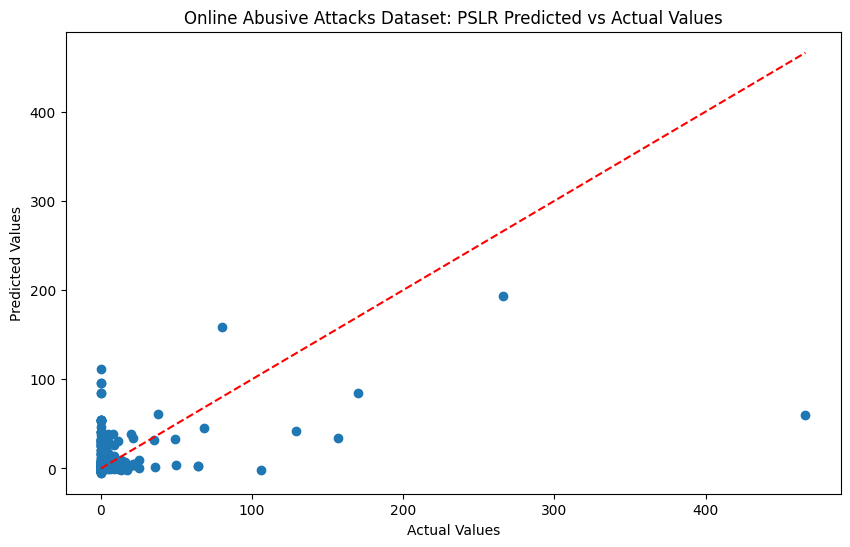

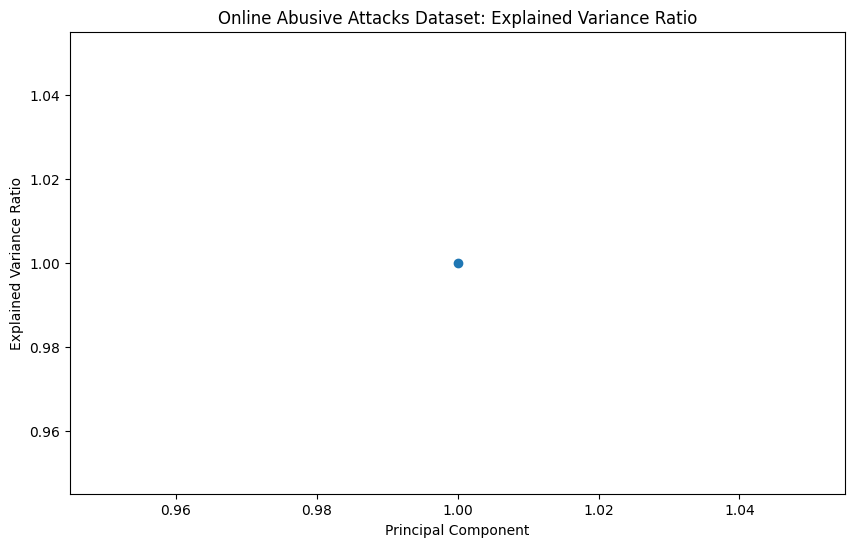

Number of Components: 2
0.9999999999999999


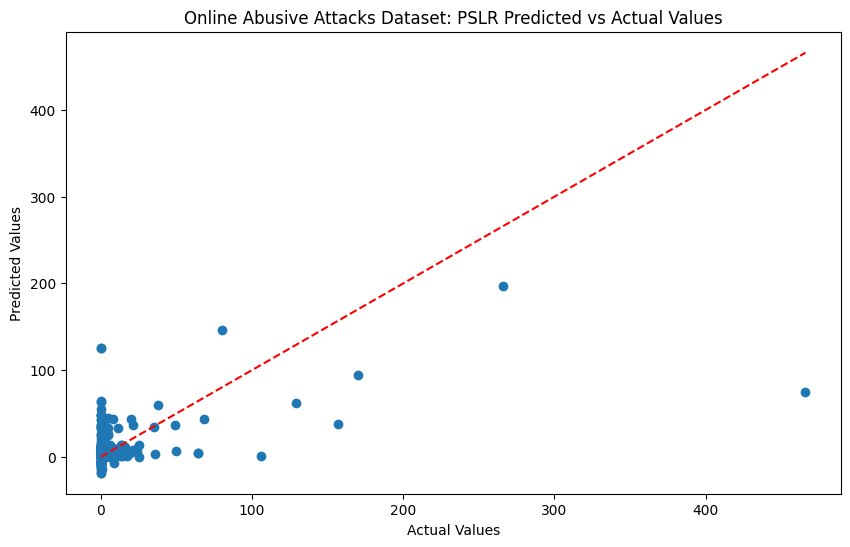

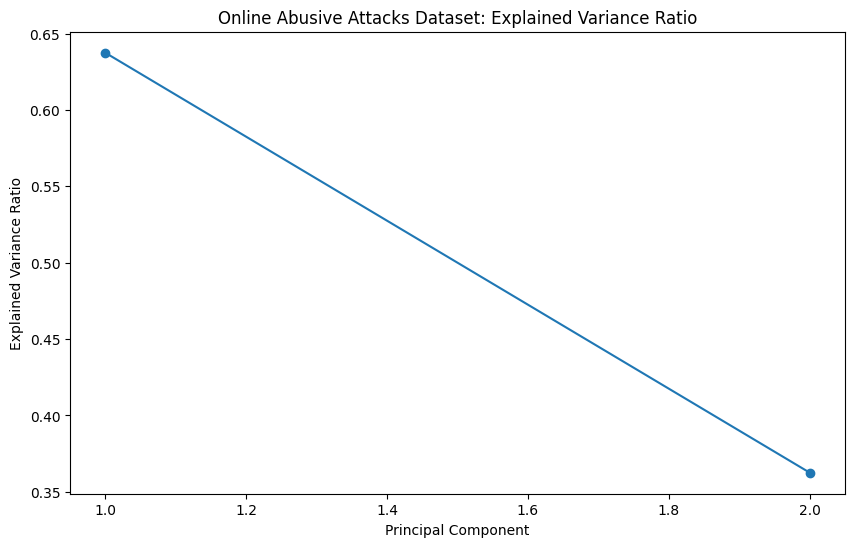

Number of Components: 3
0.9999999999999999


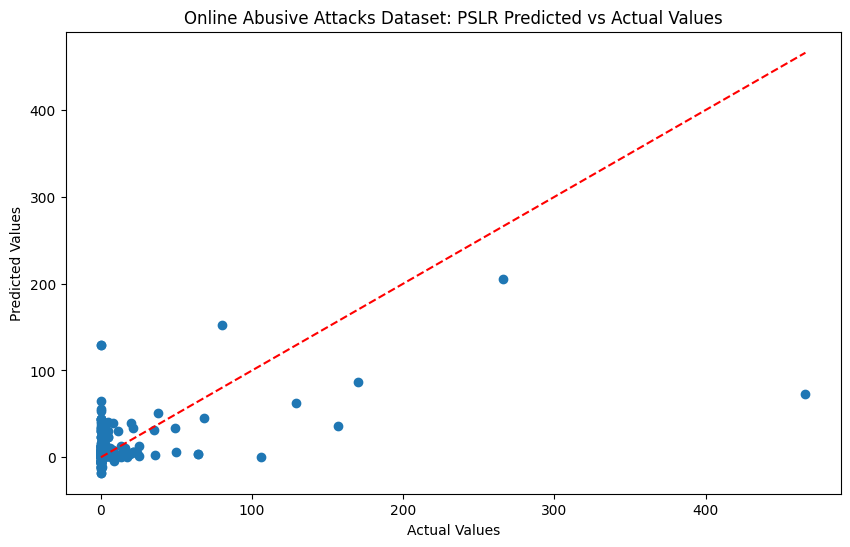

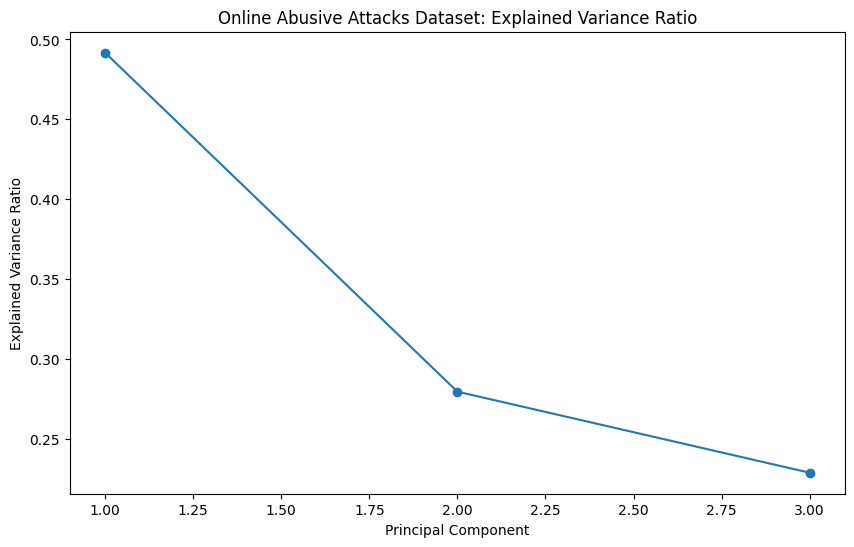

Number of Components: 4
0.9999999999999998


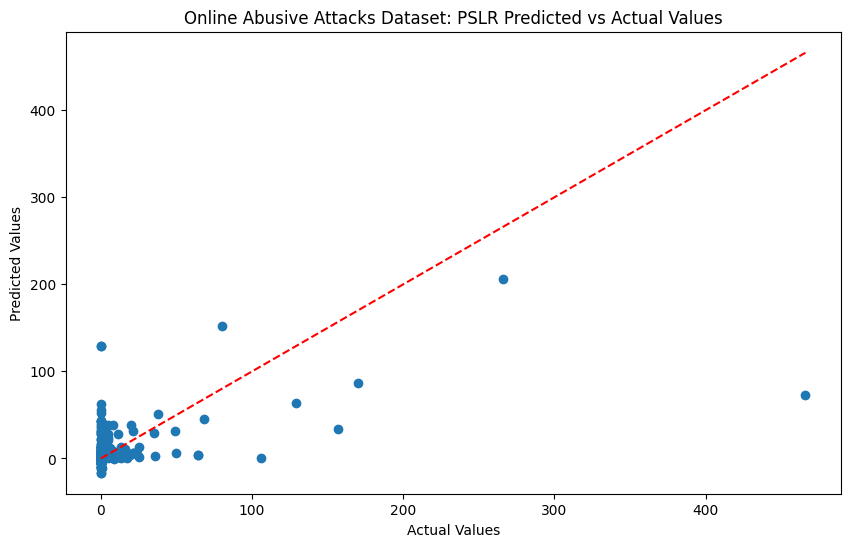

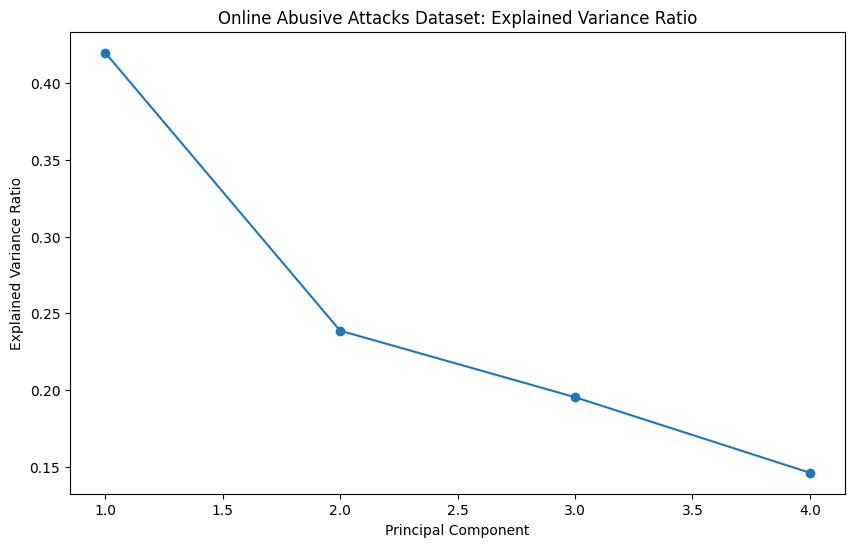

Number of Components: 5
1.0


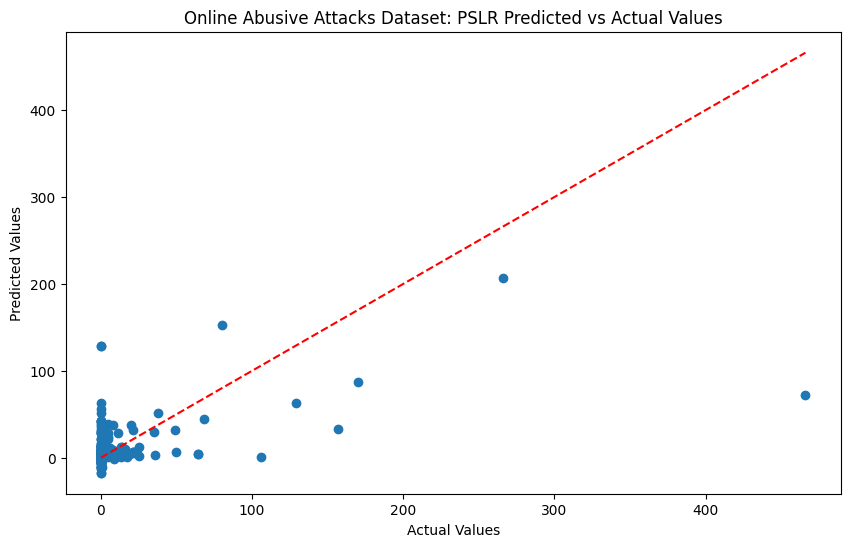

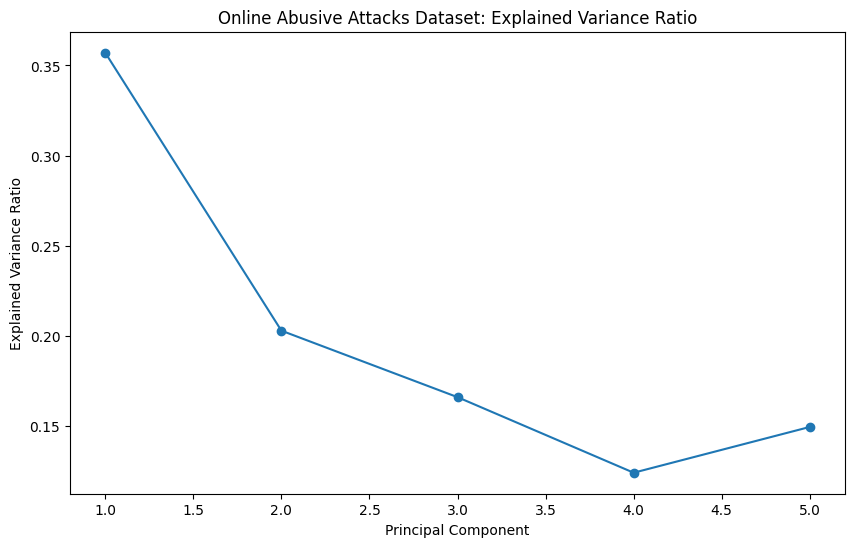

Number of Components: 6
0.9999999999999999


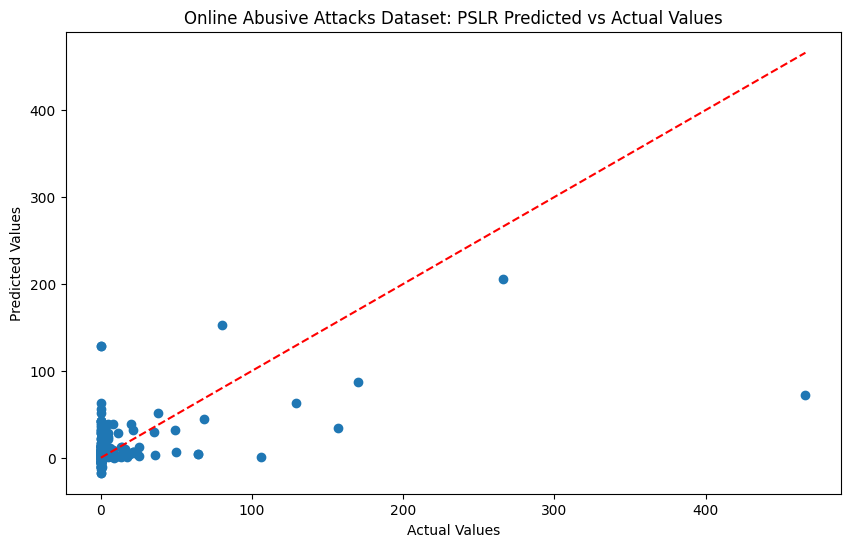

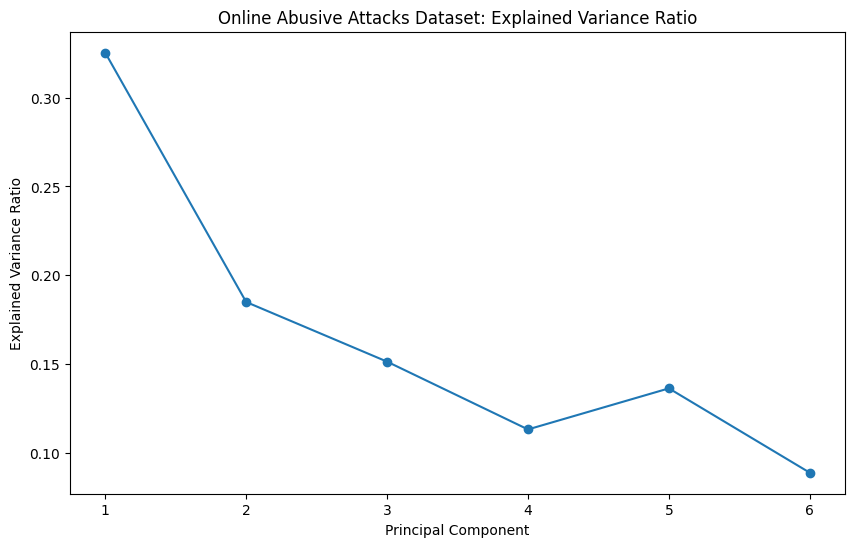

Number of Components: 7
1.0


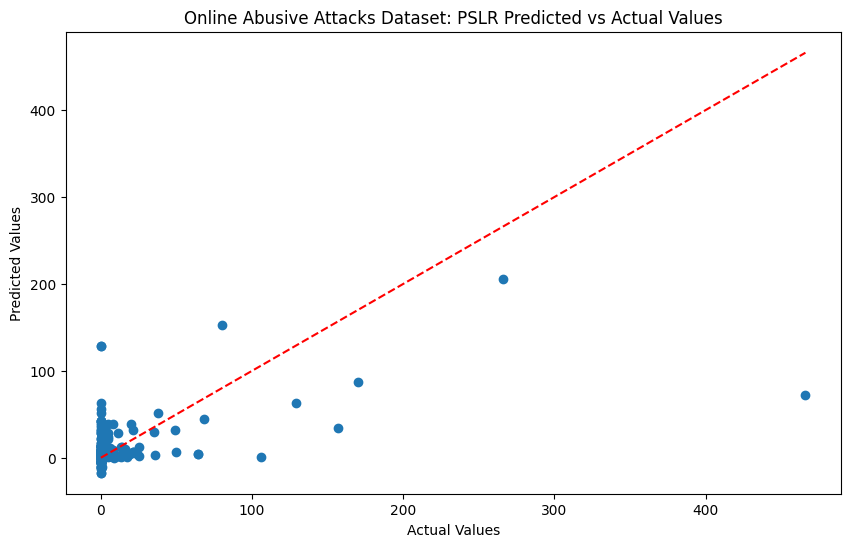

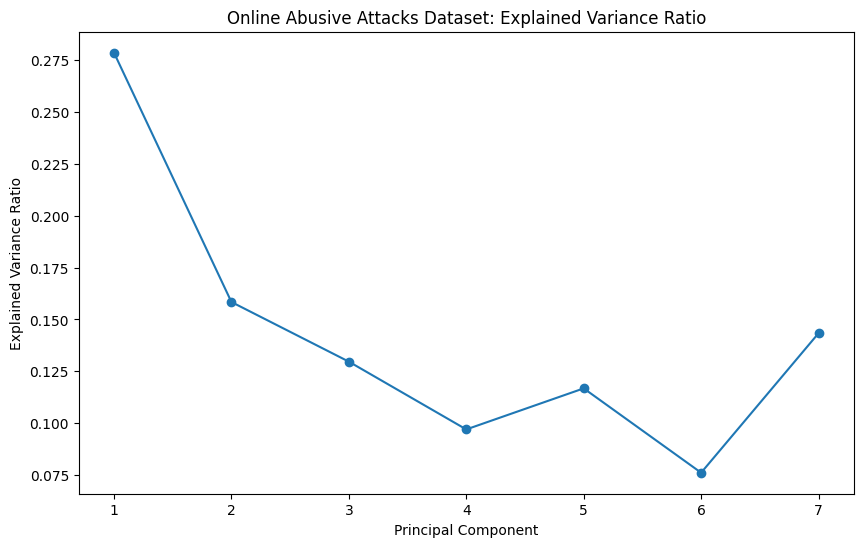

Number of Components: 8
0.9999999999999999


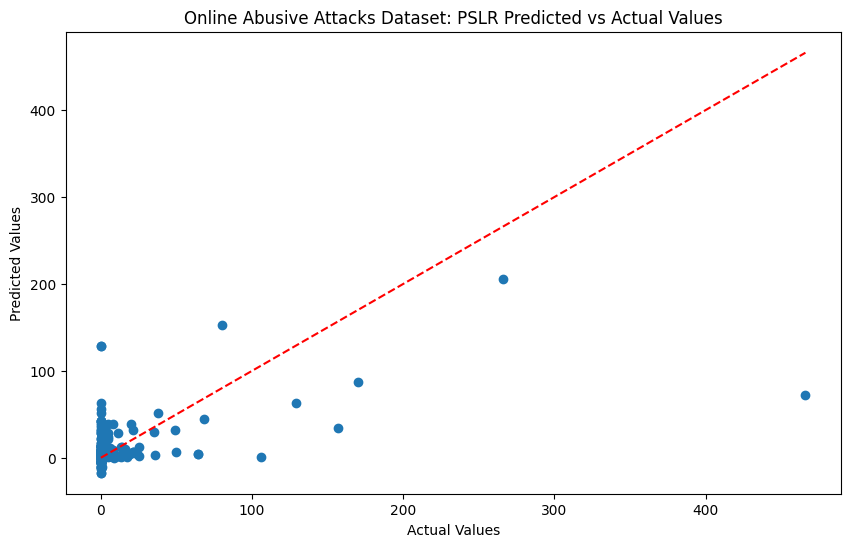

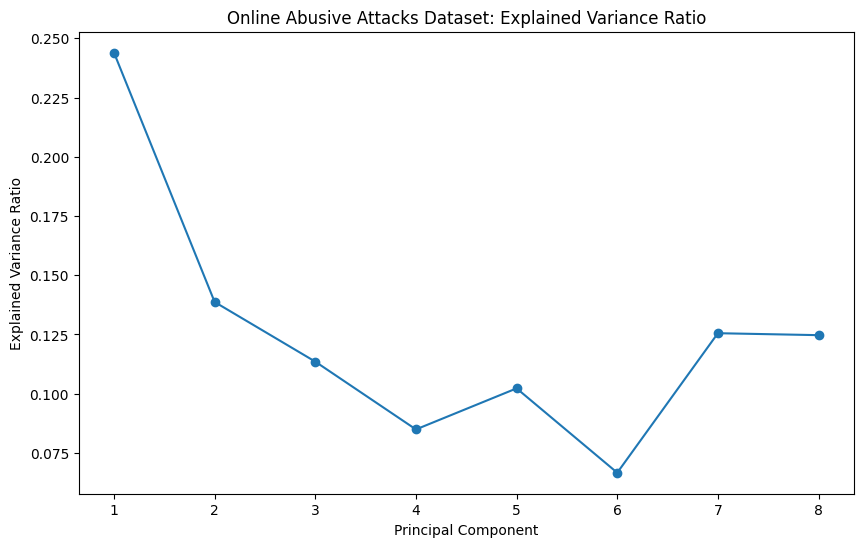

Number of Components: 9
0.9999999999999999


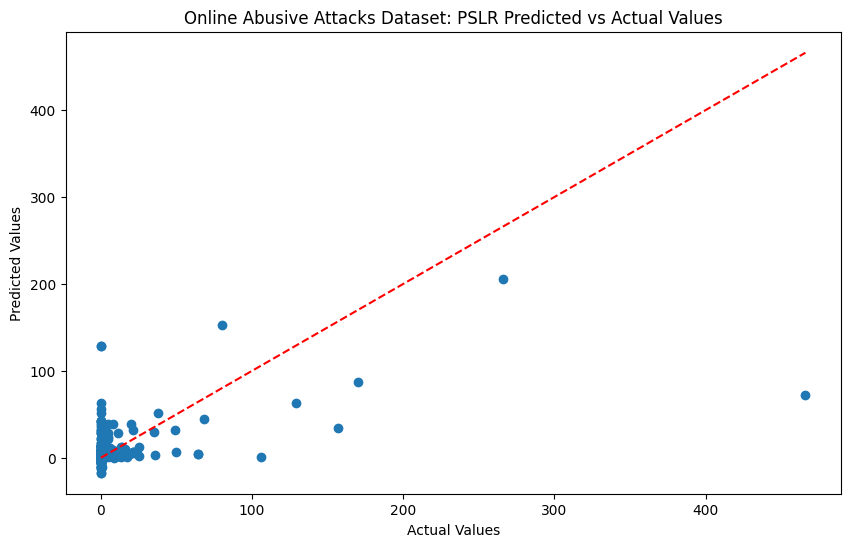

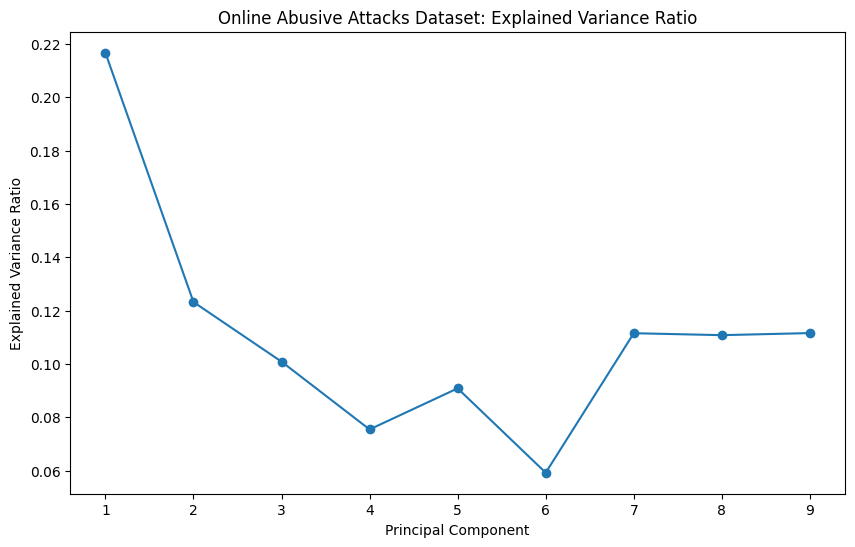

Number of Components: 10
0.9999999999999998


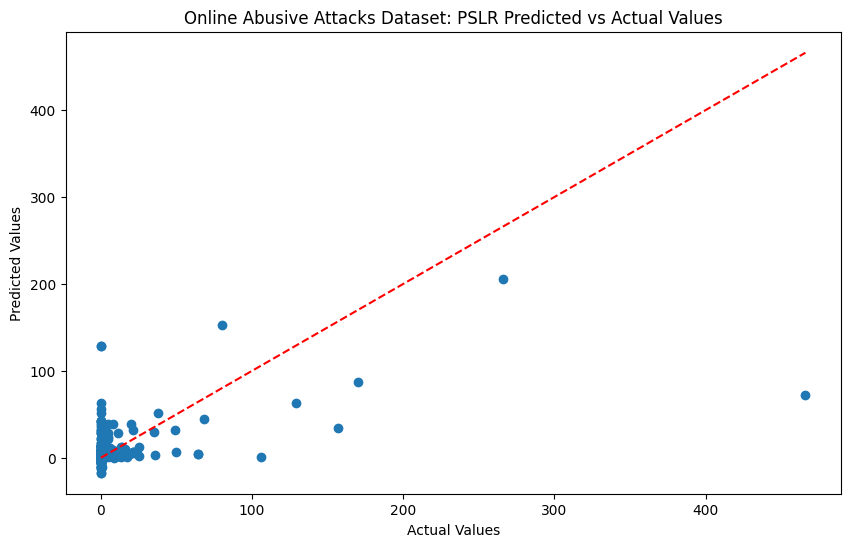

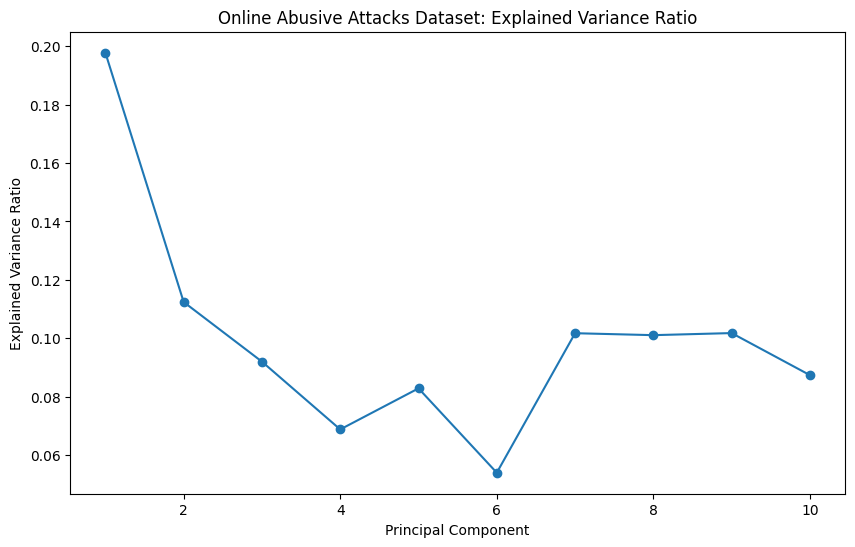

Number of Components: 11
0.9999999999999999


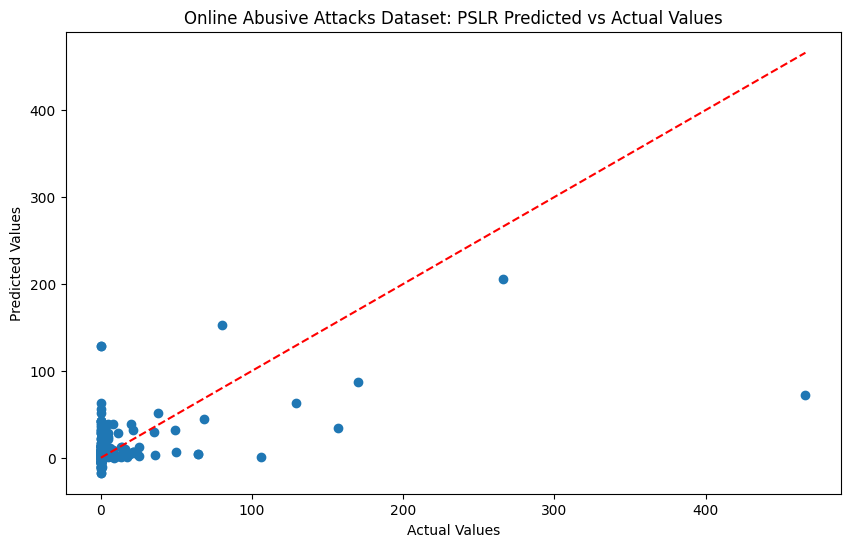

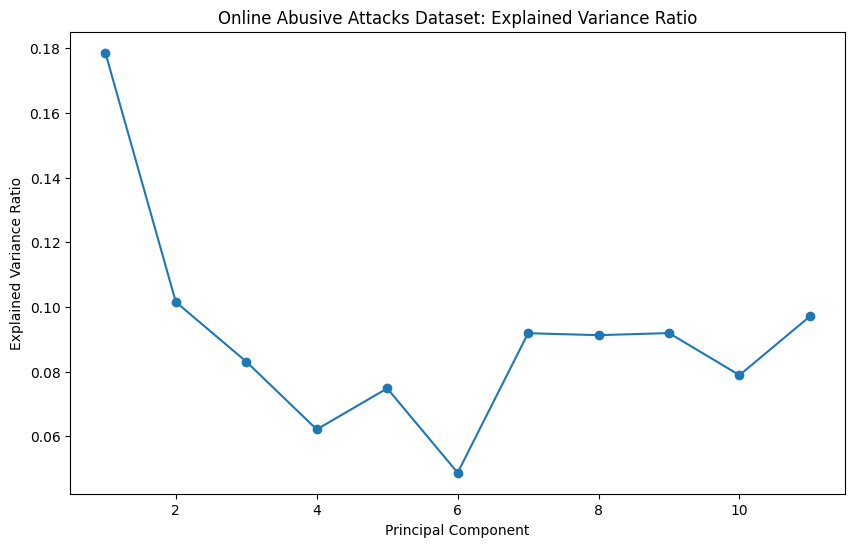

Number of Components: 12
0.9999999999999999


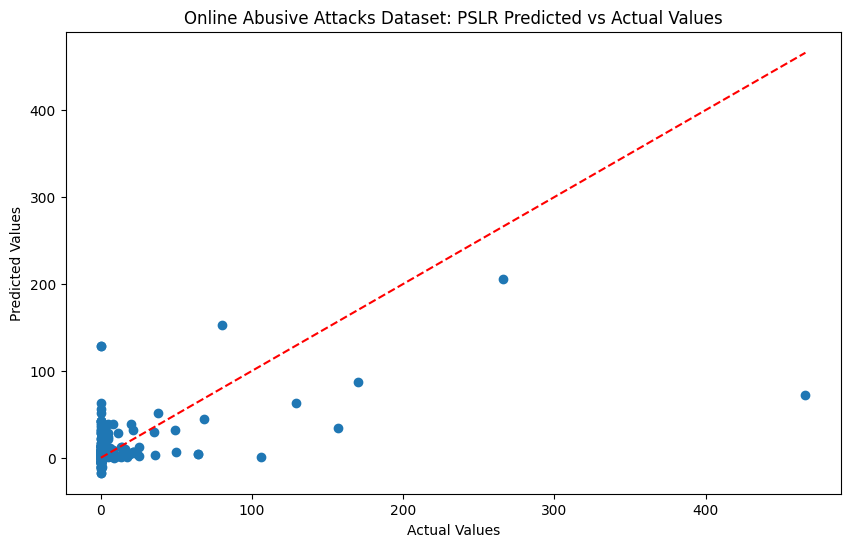

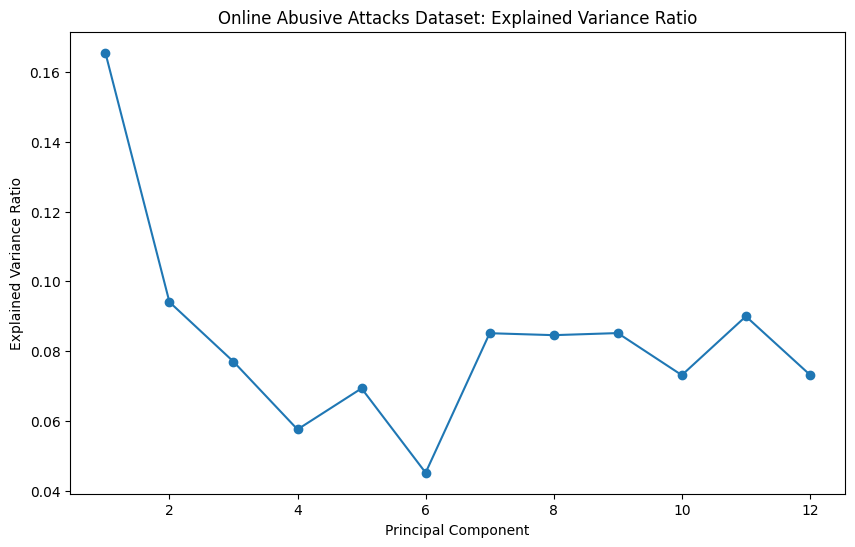

Number of Components: 13
0.9999999999999998


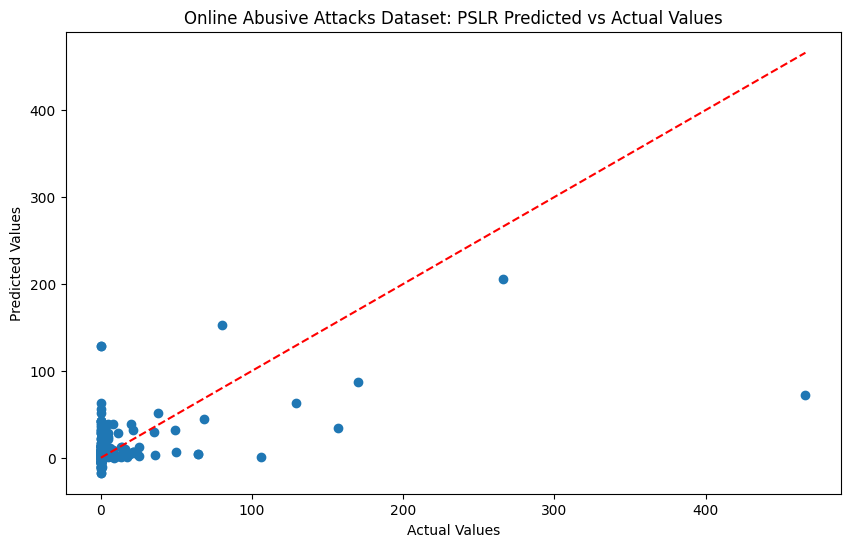

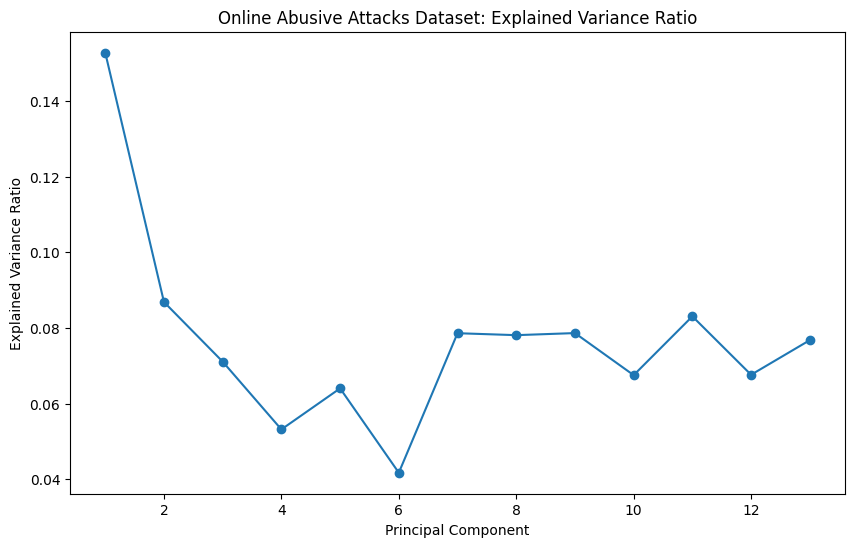

Number of Components: 14
1.0


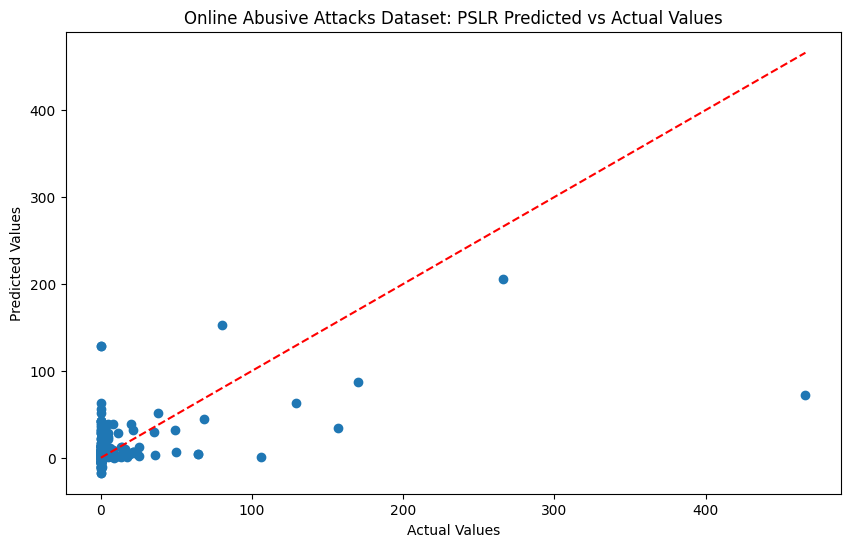

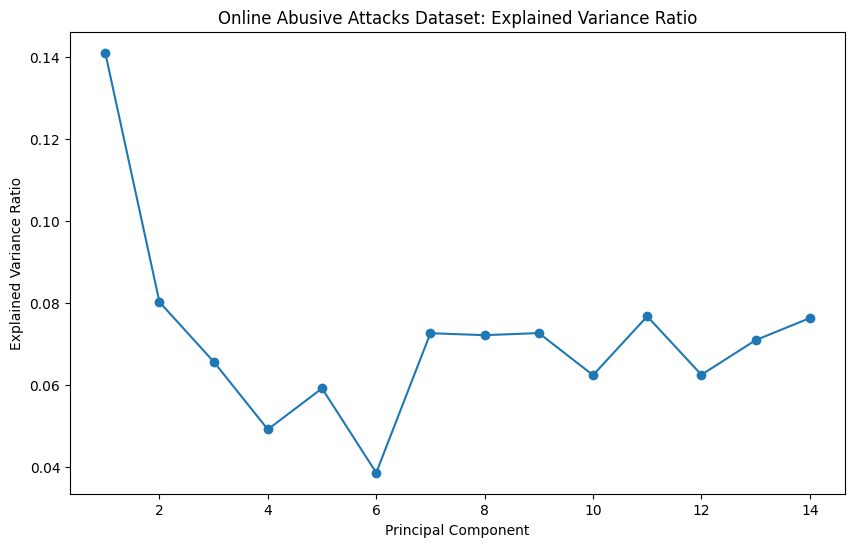

In [62]:
pslr_variance, pslr_scores, pslr_rmse, pslr_r2, pslr_predictions = pslr_tests(max_components_range)

In [63]:
pslr_variance

[array([1.]),
 array([0.63753979, 0.36246021]),
 array([0.49168189, 0.27953568, 0.22878243]),
 array([0.41984378, 0.23869359, 0.19535574, 0.14610689]),
 array([0.35702752, 0.2029807 , 0.16612697, 0.12424665, 0.14961817]),
 array([0.3253121 , 0.18494954, 0.1513696 , 0.11320959, 0.13632731,
        0.08883187]),
 array([0.27866743, 0.15843067, 0.12966557, 0.0969771 , 0.1167801 ,
        0.07609477, 0.14338437]),
 array([0.24392213, 0.13867694, 0.11349838, 0.08488563, 0.10221952,
        0.06660699, 0.12550667, 0.12468375]),
 array([0.2167117 , 0.12320701, 0.10083721, 0.07541632, 0.09081655,
        0.05917673, 0.11150593, 0.11077481, 0.11155373]),
 array([0.1977705 , 0.11243838, 0.09202376, 0.06882473, 0.08287893,
        0.05400452, 0.10176001, 0.10109279, 0.10180363, 0.08740275]),
 array([0.17856844, 0.10152143, 0.08308893, 0.06214235, 0.074832  ,
        0.04876108, 0.09187986, 0.09127742, 0.09191924, 0.07891658,
        0.09709268]),
 array([0.16548878, 0.09408526, 0.07700288, 0.0575

In [64]:
pslr_scores

[np.float64(1.0),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999998),
 np.float64(1.0),
 np.float64(0.9999999999999999),
 np.float64(1.0),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999998),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999998),
 np.float64(1.0)]

In [67]:
# Sort the pslr_scores
pslr_scores_sorted = sorted(pslr_scores, reverse=True)
pslr_scores_sorted

[np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999999),
 np.float64(0.9999999999999998),
 np.float64(0.9999999999999998),
 np.float64(0.9999999999999998)]

In [68]:
# Get the indices corresponding to the top 4 pslr scores
top_4_indices = [pslr_scores.index(score) for score in pslr_scores_sorted[:4]]
top_4_indices

[0, 0, 0, 0]

In [69]:
pslr_scores_max_index = pslr_scores.index(max(pslr_scores))
pslr_scores_max_index

0

In [70]:
ideal_pslr_n_components = max_components_range[pslr_scores_max_index] + 1 # add 1 to ensure more than 1 component
ideal_pslr_n_components

2

## Online Abusive Attacks Principal Components Regression Conclusion

In [71]:
# Calculate RMSE for the Convabuse PCR predictions
online_abusive_attacks_pcr_rmse = root_mean_squared_error(online_abusive_attacks_y_test, pcr_predictions)
online_abusive_attacks_pcr_r2 = r2_score(online_abusive_attacks_y_test, pcr_predictions)

# Calculate RMSE for the Convabuse PLS predictions
online_abusive_attacks_pls_rmse = root_mean_squared_error(online_abusive_attacks_y_test, pslr_predictions)
online_abusive_attacks_pls_r2 = r2_score(online_abusive_attacks_y_test, pslr_predictions)

# Print RMSE values for PCR and PLS
print(f"Convabuse PCR RMSE: {online_abusive_attacks_pcr_rmse:.2f}")
print(f"Convabuse PCR R2 Score: {online_abusive_attacks_pcr_r2:.2f}")
print(f"Convabuse PLS RMSE: {online_abusive_attacks_pls_rmse:.2f}")
print(f"Convabuse PLS R2 Score: {online_abusive_attacks_pls_r2:.2f}")
print()

# Compare the RMSE values for PCR and PLS
if online_abusive_attacks_pcr_rmse < online_abusive_attacks_pls_rmse:
    print("The PCR model performed better on the Convabuse dataset with an RMSE of {:.2f}.".format(online_abusive_attacks_pcr_rmse))
else:
    print("The PLS model performed better on the Convabuse dataset with an RMSE of {:.2f}.".format(online_abusive_attacks_pls_rmse))

# Compare the R2 values for PCR and PLS
if online_abusive_attacks_pcr_r2 > online_abusive_attacks_pls_r2:
    print("The PCR model performed better on the Convabuse dataset with an R2 score of {:.2f}.".format(online_abusive_attacks_pcr_r2))
else:
    print("The PLS model performed better on the Convabuse dataset with an R2 score of {:.2f}.".format(online_abusive_attacks_pls_r2))

Convabuse PCR RMSE: 25.18
Convabuse PCR R2 Score: 0.25
Convabuse PLS RMSE: 25.18
Convabuse PLS R2 Score: 0.25

The PLS model performed better on the Convabuse dataset with an RMSE of 25.18.
The PLS model performed better on the Convabuse dataset with an R2 score of 0.25.


## Stepwise Regression Model Summary

In [72]:
# Create a feature regression model dictionary where each dataset maps to its RMSE and R2
stepwise_regression_model_summary_data = [
    {
        "Model": "Forward Selection",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_forward_rmse,
        "R2": online_abusive_attacks_forward_r2
    },
    {
        "Model": "Backward Selection",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_backward_rmse,
        "R2": online_abusive_attacks_backward_r2
    },
    {
        "Model": "Principal Components Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": pcr_rmse,
        "R2": pcr_r2
    },
    {
        "Model": "Principal Least Squares Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": pslr_rmse,
        "R2": pslr_r2
    }
]

# Convert to DataFrame (datasets become rows, metrics are columns)
stepwise_regression_model_summary = pd.DataFrame(stepwise_regression_model_summary_data)
stepwise_regression_model_summary

,Model,Dataset,RMSE,R2
0,Forward Selection,Online Abusive Attacks,29.130064,-0.007322
1,Backward Selection,Online Abusive Attacks,29.130064,-0.007322
2,Principal Components Regression,Online Abusive Attacks,25.184477,0.247075
3,Principal Least Squares Regression,Online Abusive Attacks,25.184477,0.247075


In [73]:
# Export the feature_regression_model_summary and the linear_regression_model_summary
stepwise_regression_model_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model3_stepwise-regression-summary.csv", index=False)